In [152]:
import pandas as pd
import numpy as np
crime=pd.read_csv("Crimes_2018_Modified.csv")
housing=pd.read_csv("Housing_Modified.csv")

In [10]:
# top 10 primary crimes
crime.pivot_table(index="Primary_Type",values="Case Number",aggfunc=np.size).sort_values(by="Case Number",ascending=False).head(10)

,Case Number
Primary_Type,
THEFT,65155
BATTERY,49791
CRIMINAL DAMAGE,27816
ASSAULT,20390
DECEPTIVE PRACTICE,18937
OTHER OFFENSE,17167
NARCOTICS,13231
BURGLARY,11734
MOTOR VEHICLE THEFT,9979


In [18]:
# how many times police made arrest o domestic crimes.

crime[(crime["Domestic"]==True)& (crime["Arrest"]==True)].pivot_table(index="Arrest",values="Domestic",aggfunc=np.size)

,Domestic
Arrest,
True,7564


In [78]:
# 5 safest community names
crime_housing5=pd.merge(crime,housing,left_on=["Community Areas","Wards"],right_on=["Community_Area_Number","Wards"])
o=crime_housing5.pivot_table(index="Community_Area_Name",values="Case Number",aggfunc=np.size).sort_values(by="Case Number").head(5)
o

,Case Number
Community_Area_Name,
Hyde Park,48
Ashburn,262
South lawndale,349
Gage Park,465
New City,668


In [84]:
#4.How many times police made arrests when crime happened on streets?
crime_housing5[(crime_housing5["Location_Description"]== "STREET") &(crime_housing5["Arrest"]==True)].pivot_table(index='Arrest',values="Location_Description",aggfunc=np.size)

,Location_Description
Arrest,
True,7334


In [111]:
#5.Find total no. of cases recorded in 2018
crime_housing5["Date"]=crime_housing5["Date"].str.replace("/","-")
crime_housing5["Year_Of_Incident"]=crime_housing5["Date"].str.split("-").str[2].str.split(" ").str[0]
crime_housing5.pivot_table(index="Year_Of_Incident",values="Case Number",aggfunc=np.size)

,Case Number
Year_Of_Incident,
2018,143351


In [123]:
#extracting date out of the date column which consists time also
crime_housing5["DATE"]=crime_housing5["Date"].str.split(" ").str[0]
crime_housing5["DATE"]=pd.to_datetime(crime_housing5["DATE"],format='%m-%d-%Y')
crime_housing5["Month"]=crime_housing5["DATE"].dt.strftime("%b")
crime_housing5["Week_Day"]=crime_housing5["DATE"].dt.strftime("%A")

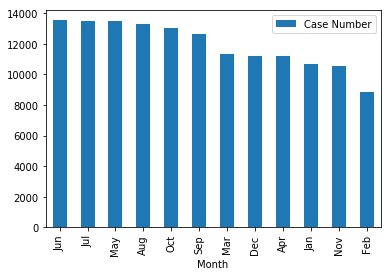

In [122]:
# 6.Analyse month wise crimes and plot the same, also determine in which 3 months crime rate is high

crime_month_plot=crime_housing5.pivot_table(index="Month",values="Case Number",aggfunc=np.size).sort_values(by="Case Number",ascending=False)

import matplotlib.pyplot
%matplotlib inline
crime_month_plot.plot(kind="bar")

# crime rate is higher in the months of june july and may.

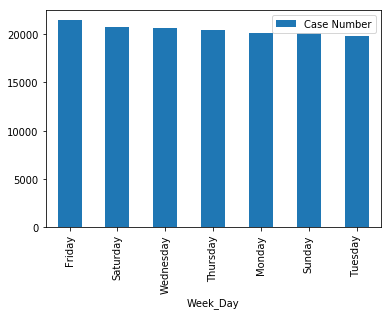

In [130]:
# 7.Analyse day wise crimes and line plot the same, also determine in which 5 days crime rate is high
crime_weekday_plot=crime_housing5.pivot_table(index="Week_Day",values="Case Number",aggfunc=np.size).sort_values(by="Case Number",ascending=False)
crime_weekday_plot.plot(kind="bar")
#Friday sat wed thurs mon are the 5 days wen the crime rate is high

In [131]:
# 8.Analyse Monthly Domestic Violence
crime_housing5[crime_housing5["Domestic"]==True].pivot_table(index="Month",values="Domestic",aggfunc=np.size)

,Domestic
Month,
Apr,1875
Aug,2033
Dec,1660
Feb,1336
Jan,1485
Jul,2131
Jun,2301
Mar,1648
May,2168


In [135]:
# 9.Find 5 safest districts and 5 dangerous districts to live
safest_dist=crime_housing5.pivot_table(index='District',values="Case Number",aggfunc=np.size).sort_values(by="Case Number").head(5)

safest_dist

,Case Number
District,
2,177
6,279
8,827
4,919
10,2307


In [137]:
dangerous_dist=safest_dist=crime_housing5.pivot_table(index='District',values="Case Number",aggfunc=np.size).sort_values(by="Case Number",ascending=False).head(5)
dangerous_dist

,Case Number
District,
11,44261
12,29801
1,18732
25,16467
17,6080


In [141]:
# 10.What are the most happening crimes in the month of Christmas
# top 5
crime_housing5[crime_housing5["Month"]=="Dec"].pivot_table(index="Primary_Type",values="Case Number",aggfunc=np.size).sort_values(by="Case Number",ascending=False).head(5)

,Case Number
Primary_Type,
THEFT,2347
BATTERY,2182
CRIMINAL DAMAGE,1092
NARCOTICS,865
ASSAULT,864


In [151]:
# 11.Find no of Kidnap crimes happened on Streets, Side Walk

list_location=["STREET","SIDEWALK"]
crime_housing5[(crime_housing5["Location_Description"].isin(list_location))&(crime_housing5["Primary_Type"]=="KIDNAPPING")].pivot_table(index="Primary_Type",values="Case Number",aggfunc=np.size)

,Case Number
Primary_Type,
KIDNAPPING,41
